In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Article Link
#https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-?utm_campaign=Data%2BElixir&utm_medium=web&utm_source=Data_Elixir_149

In [2]:
!pip install tweepy

  Running setup.py bdist_wheel for oauthlib: started
  Running setup.py bdist_wheel for oauthlib: finished with status 'done'
  Stored in directory: C:\Users\sreeram\AppData\Local\pip\Cache\wheels\f2\65\44\161426fc672522705a712b38a67376d8cc122ab7ca2e7dce2a
Successfully built oauthlib


In [2]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [3]:
# Tweets Extraction

#1. Create an extractor object
extractor = twitter_setup()

#2. Create a tweet list
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)

#3. 5 recent tweets

print("5 Recent tweets are :\n")
for x in tweets[:5]:
    print(x.text)
    

5 Recent tweets are :

Governor @RicardoRossello- 
We are with you and the people of Puerto Rico. Stay safe! #PRStrong
Senator (Doctor) Bill Cassidy is a class act who really cares about people and their Health(care), he doesn't lie-just wants to help people!
The NRA strongly endorses Luther Strange for Senator of Alabama.That means all gun owners should vote for Big Luther. He won't let you down!
I would not sign Graham-Cassidy if it did not include coverage of pre-existing conditions. It does! A great Bill. Repeal &amp; Replace.
Alabama is sooo lucky to have a candidate like "Big" Luther Strange. Smart, tough on crime, borders &amp; trade, loves Vets &amp; Military. Tuesday!


In [4]:
##1.4. Creating a (pandas) DataFrame

# We create a pandas dataframe as follows:
data = pd.DataFrame(data = [x.text for x in tweets], columns = ['Tweets'])
print(data.head(10))

                                              Tweets
0  Governor @RicardoRossello- \nWe are with you a...
1  Senator (Doctor) Bill Cassidy is a class act w...
2  The NRA strongly endorses Luther Strange for S...
3  I would not sign Graham-Cassidy if it did not ...
4  Alabama is sooo lucky to have a candidate like...
5  On behalf of all Americans, I want to wish Jew...
6  RT @VP: Went to the Senate today to say @POTUS...
7  Honored to host a luncheon for African leaders...
8  Honored to meet w/ Pres Abbas from the Palesti...
9  It was a great honor to be with King Abdullah ...


In [5]:
# Internal methods of a single tweet object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [6]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

910703407555600386
2017-09-21 03:13:07
Twitter for iPhone
12967
3065
None
None
{u'symbols': [], u'user_mentions': [{u'id': 80013913, u'indices': [9, 25], u'id_str': u'80013913', u'screen_name': u'ricardorossello', u'name': u'Ricardo Rossello'}], u'hashtags': [{u'indices': [86, 95], u'text': u'PRStrong'}], u'urls': []}


In [7]:
## We add the relevant data
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [8]:
print(data.head(10))

                                              Tweets  len                  ID  \
0  Governor @RicardoRossello- \nWe are with you a...   95  910703407555600386   
1  Senator (Doctor) Bill Cassidy is a class act w...  140  910671525543645185   
2  The NRA strongly endorses Luther Strange for S...  140  910665452048838661   
3  I would not sign Graham-Cassidy if it did not ...  135  910641701064204288   
4  Alabama is sooo lucky to have a candidate like...  148  910635327672512512   
5  On behalf of all Americans, I want to wish Jew...  138  910632095088889857   
6  RT @VP: Went to the Senate today to say @POTUS...  144  910581819078316034   
7  Honored to host a luncheon for African leaders...  143  910580644597649409   
8  Honored to meet w/ Pres Abbas from the Palesti...  144  910551350408241152   
9  It was a great honor to be with King Abdullah ...  140  910524897515905025   

                 Date              Source  Likes   RTs  
0 2017-09-21 03:13:07  Twitter for iPhone  12967  3

In [13]:
## 2. Visualization and basic statistics
mean_of_tweets = data.mean()

In [14]:
print(mean_of_tweets)

len      1.227350e+02
ID       9.067894e+17
Likes    5.872627e+04
RTs      1.587247e+04
dtype: float64


In [15]:
print(data.len.mean())

122.735


In [16]:
fav_max = np.max(data.Likes)
rt_max = np.max(data.RTs)

In [17]:
fav_max

183083

In [18]:
fav = data[data.Likes == fav_max].index
rt = data[data.RTs == rt_max]

In [19]:
fav


Int64Index([29], dtype='int64')

In [12]:
fav = fav.index[0]
rt = rt.index[0]

AttributeError: 'Int64Index' object has no attribute 'index'

In [20]:
print("The tweet with more likes is :\n{}".format(data[tweets][fav]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [21]:
print("The max likes is : \n{}".format(fav_max))

The max likes is : 
183083


In [23]:
data.head(5)

,Tweets,len,ID,Date,Source,Likes,RTs
0,Governor @RicardoRossello- \nWe are with you a...,95,910703407555600386,2017-09-21 03:13:07,Twitter for iPhone,12967,3065
1,Senator (Doctor) Bill Cassidy is a class act w...,140,910671525543645185,2017-09-21 01:06:25,Twitter for iPhone,25666,5483
2,The NRA strongly endorses Luther Strange for S...,140,910665452048838661,2017-09-21 00:42:17,Twitter for iPhone,25891,5347
3,I would not sign Graham-Cassidy if it did not ...,135,910641701064204288,2017-09-20 23:07:55,Twitter for iPhone,39760,9906
4,Alabama is sooo lucky to have a candidate like...,148,910635327672512512,2017-09-20 22:42:35,Twitter for iPhone,26251,4874


In [29]:
data.Date[:30]

0    2017-09-20 02:41:13
1    2017-09-20 02:33:32
2    2017-09-20 02:31:19
3    2017-09-20 02:23:52
4    2017-09-20 01:19:00
5    2017-09-19 22:04:11
6    2017-09-19 20:05:32
7    2017-09-19 19:09:35
8    2017-09-19 17:22:27
9    2017-09-19 11:22:59
10   2017-09-19 11:21:30
11   2017-09-19 04:47:03
12   2017-09-19 04:18:41
13   2017-09-19 03:01:25
14   2017-09-18 23:31:07
15   2017-09-18 16:57:27
16   2017-09-18 16:36:09
17   2017-09-18 13:16:17
18   2017-09-18 13:14:46
19   2017-09-17 13:03:32
20   2017-09-17 13:02:26
21   2017-09-17 13:00:05
22   2017-09-17 12:29:57
23   2017-09-17 12:28:08
24   2017-09-17 12:16:31
25   2017-09-17 12:12:19
26   2017-09-17 12:12:02
27   2017-09-17 12:11:39
28   2017-09-17 12:05:59
29   2017-09-17 12:02:42
Name: Date, dtype: datetime64[ns]

In [24]:
## Time series

tlen = pd.Series(data = data.len.values, index = data.Date)
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

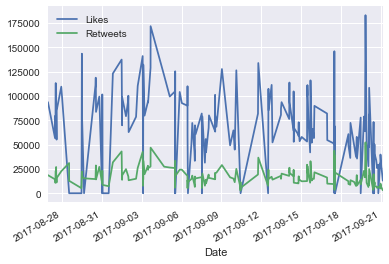

In [25]:
tfav.plot(label = "Likes", legend = True)
tret.plot(label = "Retweets", legend = True)

In [26]:
!pip install textblob

In [27]:
from textblob import TextBlob

In [28]:
import re

In [29]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    

In [30]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity >0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [31]:
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data['Tweets']])

In [32]:
data.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Governor @RicardoRossello- \nWe are with you a...,95,910703407555600386,2017-09-21 03:13:07,Twitter for iPhone,12967,3065,1
1,Senator (Doctor) Bill Cassidy is a class act w...,140,910671525543645185,2017-09-21 01:06:25,Twitter for iPhone,25666,5483,1
2,The NRA strongly endorses Luther Strange for S...,140,910665452048838661,2017-09-21 00:42:17,Twitter for iPhone,25891,5347,1
3,I would not sign Graham-Cassidy if it did not ...,135,910641701064204288,2017-09-20 23:07:55,Twitter for iPhone,39760,9906,1
4,Alabama is sooo lucky to have a candidate like...,148,910635327672512512,2017-09-20 22:42:35,Twitter for iPhone,26251,4874,1
5,"On behalf of all Americans, I want to wish Jew...",138,910632095088889857,2017-09-20 22:29:44,Twitter for iPhone,30671,7333,1
6,RT @VP: Went to the Senate today to say @POTUS...,144,910581819078316034,2017-09-20 19:09:58,Twitter for iPhone,0,5997,0
7,Honored to host a luncheon for African leaders...,143,910580644597649409,2017-09-20 19:05:18,Twitter for iPhone,29361,6635,1
8,Honored to meet w/ Pres Abbas from the Palesti...,144,910551350408241152,2017-09-20 17:08:53,Media Studio,25757,5448,-1
9,It was a great honor to be with King Abdullah ...,140,910524897515905025,2017-09-20 15:23:46,Media Studio,34083,7087,1


In [35]:
o1 = data[data.SA == 1]

In [37]:
len(o1)

111

In [38]:
o2 = data[data.SA == -1]

In [39]:
len(o2)

36

In [40]:
print(len(data[data.SA == 0]))

53


In [64]:
print("The % of positive tweets is {%d}%".format((float(111)*100)/float(200))

SyntaxError: unexpected EOF while parsing (<ipython-input-64-7dfa4048ac18>, line 1)

In [58]:
float(111)/float(200)*100

55.50000000000001

In [71]:
print('The pos % is '{:.1%}.format(float(111)/float(200)*100))

SyntaxError: invalid syntax (<ipython-input-71-c5fbda997fdc>, line 1)

In [72]:
(float(53)/float(200))*100

26.5